<h3>   
    <li>Introduction to Supervised Learning and Unsupervised Learning</li>
    <li>Cost function</li>
    <li>Gradient descend</li>
</h3>

# Supervised learning (Học có giám sát) và Unsupervised learning (Học không giám sát)
## Supervised learning
Supervised learning là thuật toán dự đoán output của một input mới dựa vào các cặp input-output đã có, còn gọi là các cặp data-label.  
VD: Cho training data về giá nhà (target) phụ thuộc vào diện tích nhà và số phòng (features) -> Dự đoán giá một ngôi nhà mới (tức không có trong tập training data).

## Unsupervised learning
Supervised learning là thuật toán mà trong đó ta chỉ có dữ liệu input và không biết output tương ứng. Unsupervised learning dựa vào đặc điểm của dữ liệu input để thực hiện một công việc gì đó. VD: Phân nhóm dữ liệu.

In [2]:
# Mình implement các bước và công thức lun để dễ keep track
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy

In [3]:
# Load data
data = pd.read_csv("housing_price.csv")

x_train = np.array([area / 1000 for area in data['area'].values])
y_train = np.array([price / 100000 for price in data['price'].values])

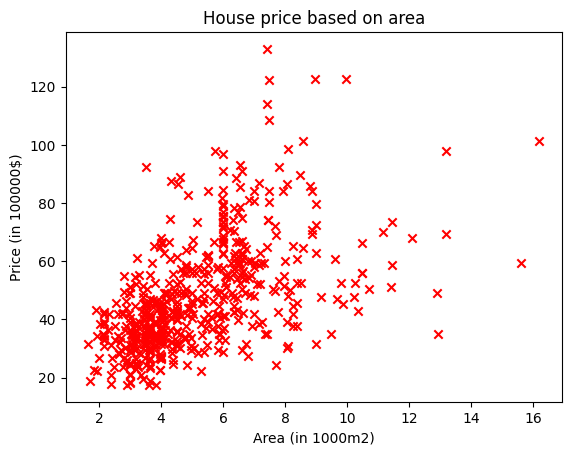

In [4]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("House price based on area")
# Set the y-axis label
plt.ylabel('Price (in 100000$)')
# Set the x-axis label
plt.xlabel('Area (in 1000m2)')
plt.show()

# Linear Regression 
Hiểu đơn giản, Linear Regression là một model dùng để dự đoán outcome của input mới dựa trên mối quan hệ giữa các cặp data-label có sẵn bằng cách fit một đường thẳng vào data points.   
Giả dụ, chúng ta muốn dự đoán giá của một căn nhà dựa trên diện tích (tính theo m2) của nó. Ta đã có data về giá của $m$ căn nhà trong một khu vực và diện tích tương ứng của mỗi căn.   
Ta có:
    <li>$x$: diện tích nhà ($m^2$) (feature)</li>
    <li>$w$: weight</li>
    <li>$b$: bias</li>
    <li>$f_{w,b}=wx^(i)+b$: giá dự đoán của nhà thứ i (predicted value)</li>   

**Goal:** Tìm weight và bias tối ưu để giá trị dự đoán $f_{w,b}=wx^i+b$ là chính xác nhất<br>
**How:** Làm cho sai số dự đoán trở thành nhỏ nhất. Tức là làm cho sự sai khác giữa giá trị dự đoán $f_{w,b}$ và giá trị thực $y$ là nhỏ nhất. Mathmatically, chúng ta muốn hàm dưới đây nhận giá trị nhỏ nhất:
$$\frac{1}{2}(f_{w,b}^{(i)} - y^{(i)})^2$$
Tương tự cho m data points, chúng ta muốn tổng sai số dự đoán là nhỏ nhất. Tức ta phải tìm $w$ và $b$ để hàm mất mát (cost function) sau đạt giá trị nhỏ nhất:
$$J_{w,b}=\frac{1}{2m}\sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

In [5]:
# Implementation for cost function
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
        x (ndarray): Shape (m,) Input to the model (Area of houses)
        y (ndarray): Shape (m,) Label (Actual price of houses)
        w, b (scalar): Parameters of the model

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    m = x.shape[0]  # number of training examples
    total_cost, cost_sum = 0, 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

## How to find $w$ and $b$ to minimize the cost function? Use Gradient Descend.
Gradient Descend là một thuật toán mà trong đó ta sử dụng các phép toán lặp để đạo hàm của hàm cần tối ưu tiến dần về 0.  
Trong trường hợp này, chúng ta cần update giá trị của $w$ và $b$ liên tục cho đến khi cost function $J_{w,b}$ đạt local minimum.   
Quy tắc update như sau:
$$w_{after}=w_{before}-\alpha \frac{\partial J_{w,b}}{\partial w}$$
$$b_{after}=b_{before}-\alpha \frac{\partial J_{w,b}}{\partial b}$$
($\alpha$: learning rate)   

Tính đạo hàm của $J_{w,b}$ theo $w$:
$$\frac{\partial J_{w,b}}{\partial w}= \frac{1}{2m} \sum_{i=0}^{m-1} 2(wx^{(i)}+b-y^{(i)}) \frac{\partial (wx^{(i)}+b-y^{(i)})}{\partial w}$$
$$= \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)})-y^{(i)})x^{(i)}$$
Tính đạo hàm của $J_{w,b}$ theo $b$:
$$\frac{\partial J_{w,b}}{\partial b}= \frac{1}{2m} \sum_{i=0}^{m-1} 2(wx^{(i)}+b-y^{(i)}) \frac{\partial (wx^{(i)}+b-y^{(i)})}{\partial b}$$
$$= \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)})-y^{(i)})$$

In [6]:
# Implementation for computing gradient, not yet gradient descend
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray): Shape (m,) Input to the model (Area of houses)
      y (ndarray): Shape (m,) Label (Actual price of houses)
      w, b (scalar): Parameters of the model
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """
    m = x.shape[0] # number of training examples
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = (1 / m) * dj_dw
    dj_db = (1 / m) * dj_db

    return dj_dw, dj_db

In [7]:
# Implementation for gradient descend
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)              Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(x)

    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #return w and J,w history for graphing

Chạy thử gradient descend để tìm $w$ và $b$ cho training data về housing price:

In [8]:
# initialize fitting parameters.
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 5000
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost   692.04   
Iteration  500: Cost   133.20   
Iteration 1000: Cost   126.46   
Iteration 1500: Cost   124.91   
Iteration 2000: Cost   124.55   
Iteration 2500: Cost   124.47   
Iteration 3000: Cost   124.45   
Iteration 3500: Cost   124.44   
Iteration 4000: Cost   124.44   
Iteration 4500: Cost   124.44   
w,b found by gradient descent: 4.622188150467461 23.85836472391846


Plot predicted values to get a linear fit

In [9]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

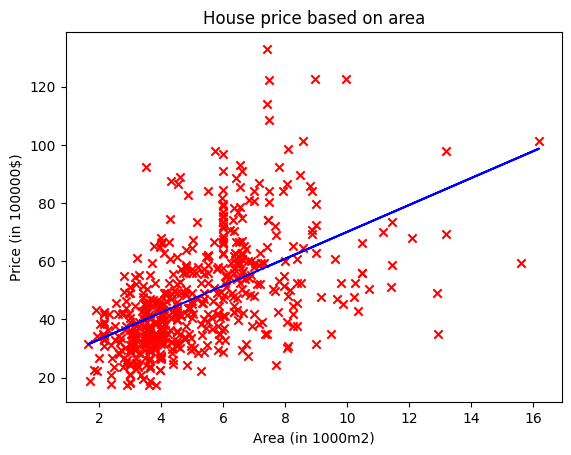

In [10]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data
plt.scatter(x_train, y_train, marker='x', c='r')

plt.title("House price based on area")
plt.ylabel('Price (in 100000$)')
plt.xlabel('Area (in 1000m2)')
plt.show()

Thử predict giá của 2 căn nhà có diện tích lần lượt là 6500 m2 và 8900 m2

In [11]:
predict1 = 6.5 * w + b
print('For a house of area 6500 m2, the predicted price is $%.2f' % (predict1*100000))

predict2 = 7.0 * w + b
print('For a house of area 8900 m2, the predicted price is $%.2f' % (predict2*100000))

For a house of area 6500 m2, the predicted price is $5390258.77
For a house of area 8900 m2, the predicted price is $5621368.18


Intuitively, mình thấy dataset này có nhiều noise (một số căn 8000 m2 có giá cao hơn căn 16000 m2) và unrealistic vì ít nhà có diện tích siêu lớn như vậy.  
Tóm tắt kiến thức đã học:
    <li>**compute_cost(x,y,w,b)**: tính cost function</li>
    <li>**compute_gradient(x,y,w,b)**: tính gradient của J(w,b) theo w và b</li>
    <li>**gradient_descend(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters)**: implement thuật toán gradient descend</li>
    <li>Chuyển data về array thay vì để ở dạng list.</li>